### Задания
1. Загрузить данные Market_Basket_Optimisation.csv.

2. Визуализировать данные (отразить на гистограммах относительную и 
фактическую частоту встречаемости для 20 наиболее популярных 
товаров). 

3. Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori).

4. Применить алгоритм FP-Growth из библиотеки fpgrowth_py.

5. Сравнить время выполнения всех алгоритмов и построить гистограмму.

6. Загрузить данные data.csv.

7. Визуализировать данные (отразить на гистограммах относительную и 
фактическую частоту встречаемости для 20 наиболее популярных 
товаров).

8. Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori).

9. Применить алгоритм FP-Growth из библиотеки fpgrowth_py.

10. Сравнить время выполнения всех алгоритмов и построить гистограмму

## Загрузка пакетов и импорт библиотек

In [ ]:
import time
import pandas as pd

import matplotlib.pyplot as plt

## Загрузка и обработка данных

In [ ]:
df = pd.read_csv('/content/Market_Basket_Optimisation.csv')
print(df.shape)
df.head(3)

(7500, 20)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
products = df.columns.tolist()
df.columns = [f'col_{i}' for i in range(1, 21)]
df.head(2)

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
products_dict = {}
for i, item in zip(range(1, 21), products):
  products_dict[f'col_{i}'] = item

df = df.append(products_dict, ignore_index=True)

In [ ]:
df.isna().sum()

col_1        0
col_2     1754
col_3     3112
col_4     4156
col_5     4972
col_6     5637
col_7     6132
col_8     6520
col_9     6847
col_10    7106
col_11    7245
col_12    7347
col_13    7414
col_14    7454
col_15    7476
col_16    7493
col_17    7497
col_18    7497
col_19    7498
col_20    7500
dtype: int64

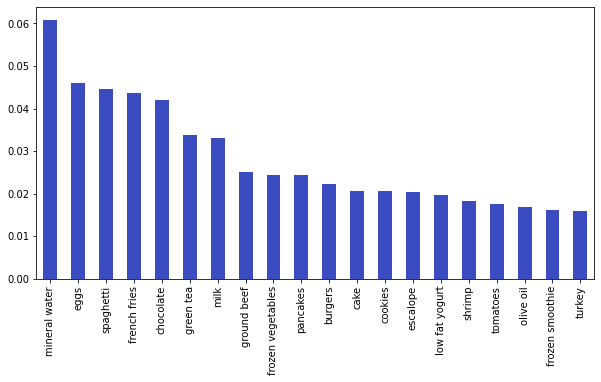

In [ ]:
df.stack().value_counts(normalize=True)[:20].plot(kind='bar', figsize=(10, 5), colormap='coolwarm');

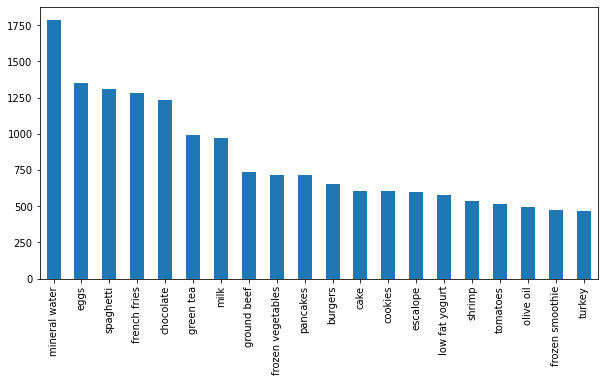

In [ ]:
df.stack().value_counts()[:20].plot(kind='bar', figsize=(10, 5), colormap='tab10');

## Реализация алгоритмов ассоциативных правил (ARL)

In [ ]:
transactions = []
for i in range(df.shape[0]):
  row = df.iloc[i].dropna().tolist()
  transactions.append(row)

In [ ]:
transactions[0]

['burgers', 'meatballs', 'eggs']

### apriori_python

minSup – это минимальная поддержка

minConf – минимальная достоверность

In [ ]:
!pip install --quiet apriori_python

In [ ]:
from apriori_python import apriori

In [ ]:
t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup = 0.04, minConf = 0.33)
time1 = time.perf_counter() - start
t.append(time1)

In [ ]:
rules

[[{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

### apyori

In [ ]:
!pip install --quiet apyori

In [ ]:
from apyori import apriori

In [ ]:
start = time.perf_counter()
lift = 1 + 1e-20

rules = apriori(transactions, minSup = 0.02, minConf = 0.04, min_lift=lift)
time2 = time.perf_counter() - start
t.append(time2)

In [ ]:
rules = list(rules)
for rule in rules:
  for subset in rule[2]:
    print(subset[0], subset[1])
    print('Support: {0}; Confidence: {1}; Lift: {2}'.format(rule[1], subset[2], subset[3]))
    print('----------------------------------------------------------------------------')

frozenset() frozenset({'chocolate'})
Support: 0.1638448206905746; Confidence: 0.1638448206905746; Lift: 1.0
----------------------------------------------------------------------------
frozenset() frozenset({'eggs'})
Support: 0.17970937208372217; Confidence: 0.17970937208372217; Lift: 1.0
----------------------------------------------------------------------------
frozenset() frozenset({'french fries'})
Support: 0.1709105452606319; Confidence: 0.1709105452606319; Lift: 1.0
----------------------------------------------------------------------------
frozenset() frozenset({'green tea'})
Support: 0.13211571790427942; Confidence: 0.13211571790427942; Lift: 1.0
----------------------------------------------------------------------------
frozenset() frozenset({'milk'})
Support: 0.12958272230369283; Confidence: 0.12958272230369283; Lift: 1.0
----------------------------------------------------------------------------
frozenset() frozenset({'mineral water'})
Support: 0.23836821757099053; Confi

Все правила получились независимыми.

### efficient_apriori

In [ ]:
!pip install --quiet efficient_apriori

In [ ]:
from efficient_apriori import apriori

In [ ]:
start = time.perf_counter()

itemsets, rules = apriori(transactions, min_support=0.03, min_confidence=0.33)
time3 = time.perf_counter() - start
t.append(time3)

In [ ]:
for i in range(len(rules)):
  print(rules[i])

{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.572, conv: 1.218)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.305)
{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{pancakes} -> {mineral water} (conf: 0.355, supp: 0.034, lift: 1.489, conv: 1.181)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.439, conv: 1.159)


### fpgrowth_py

In [ ]:
!pip install --quiet fpgrowth_py

In [ ]:
from fpgrowth_py import fpgrowth

In [ ]:
start = time.perf_counter()

itemsets, rules = fpgrowth(transactions, minSupRatio=0.03, minConf=0.33)
time4 = time.perf_counter() - start
t.append(time4)

In [ ]:
for i in range(len(rules)):
  print(rules[i])

[{'pancakes'}, {'mineral water'}, 0.3548387096774194]
[{'frozen vegetables'}, {'mineral water'}, 0.3748251748251748]
[{'ground beef'}, {'spaghetti'}, 0.3989145183175034]
[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]


## Время выполнения алгоритмов

Время выполнения алгоритмов apriori:
apriori_python: 1.1323331790008524
apyori: 0.0001259199998457916
efficient_apriori: 0.02390212799946312
Время выполнения алгоритма fpgrowth:
fpgrowth_py: 0.4747923049999372


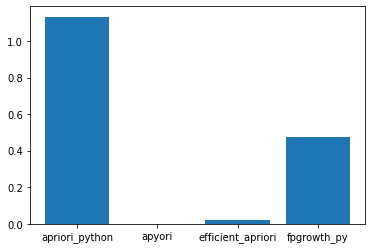

In [ ]:
print('Время выполнения алгоритмов apriori:')
print(f'apriori_python: {t[0]}')
print(f'apyori: {t[1]}')
print(f'efficient_apriori: {t[2]}')
print('Время выполнения алгоритма fpgrowth:')
print(f'fpgrowth_py: {t[3]}')

plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth_py'], t)
plt.show()